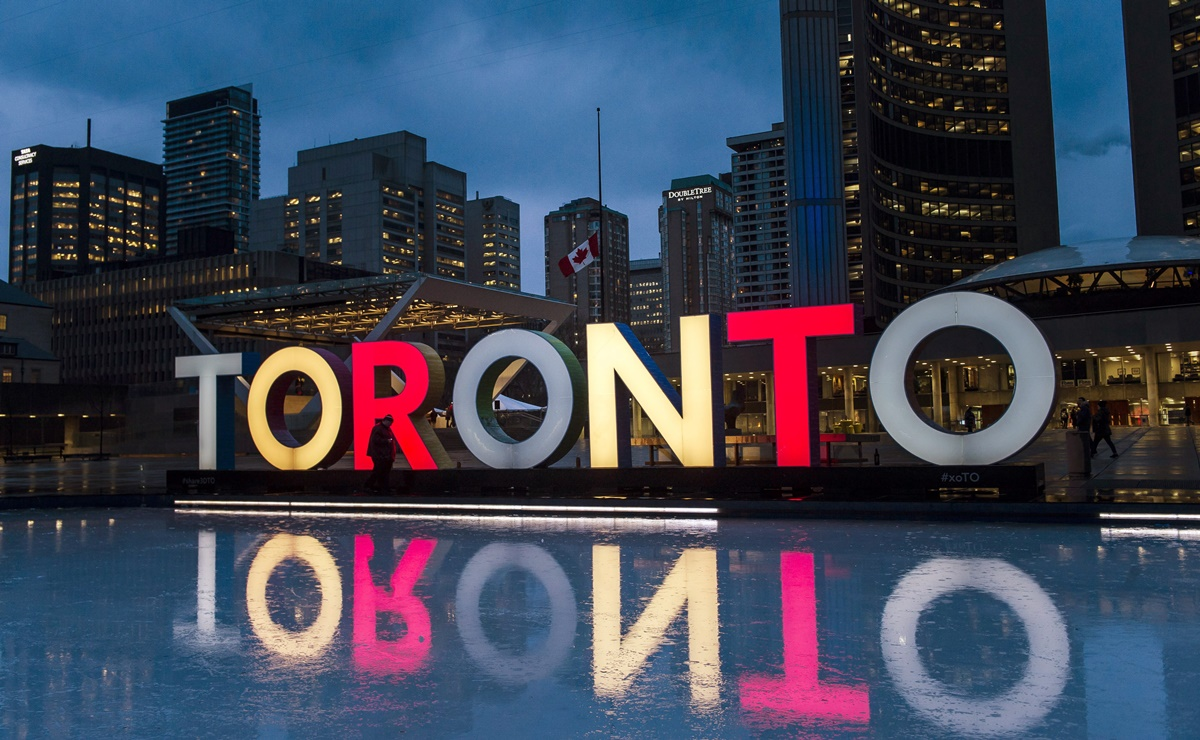
<h1 align=center><font size=5>IBM APPLIED DATASCIENCE CAPSTONE PROJECT</font></h1>

<h1 align=center><font size=5>WEEK 05</font></h1>

In [1]:
!pip install beautifulsoup4

In [2]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import requests

In [3]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
soup = bs(source.text, 'lxml')

In [4]:
data_lst = []
columns = []
table = soup.find(class_ = 'wikitable')
for idx, tr_tag in enumerate(table.find_all('tr')):
    part = []
    for td in tr_tag.find_all(['td', 'th']):
        part.append(td.text.strip())
    if not columns: #find header of the table
        columns = part
    else:
        data_lst.append(part)

In [5]:
ca_df_bs4 = pd.DataFrame(data = data_lst, columns = columns)
ca_df_bs4.head(12)

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [6]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
table = pd.read_html(source.text)

In [7]:
ca_df = pd.DataFrame(table[0])
ca_df.head(12)

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [8]:
ren_set = {'Postal Code': 'PostalCode', 'Borough':'Borough', 'Neighbourhood': 'Neighborhood'}
ca_df_temp = ca_df.rename(columns=ren_set)
ca_df_temp.head(12)

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


<ul>

In [9]:
ca_df_temp_1 = ca_df_temp[ca_df_temp['Borough'] != 'Not assigned']
ca_df_temp_1.head(12)

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


<ul>

<ul>
    <li><font size=4>More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.</font></li>
</ul>

In [10]:
if True not in ca_df.duplicated(['Postal Code']).tolist():
    print('No duplicates in the Postal Code column.')
else: 
    print('You should combine rows with duplicates in the Postal Code column')

No duplicates in the Postal Code column.


<ul>

<ul>
    <li><font size=4>If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.</font></li>
</ul>

In [11]:
if ca_df_temp[(ca_df_temp['Neighborhood'].isna())&(ca_df_temp['Borough'] != 'Not assigned')].shape[0] == 0:
    print('Table is empty, no conditions for our case.')

Table is empty, no conditions for our case.


<ul>

In [12]:
ca_df_res = ca_df_temp_1.reset_index(drop=True)
ca_df_res

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [13]:
print('The number of rows in the final dataframe:', ca_df_res.shape[0])

The number of rows in the final dataframe: 103


In [14]:
geo_df = pd.read_csv('http://cocl.us/Geospatial_data')
geo_df.head(12)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [15]:
ren_set = {'Postal Code': 'PostalCode'}
geo_df_temp = geo_df.rename(columns=ren_set)

In [16]:
df_merge = pd.merge(ca_df_res, geo_df_temp)
df_merge.head(12)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


Exploring and clustering the neighborhoods in Toronto. 

In [17]:
#import numpy as np # library to handle data in a vectorized manner

#import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
# uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libgcc-ng-9.3.0            |      h5dbcf3e_17         7.8 MB  conda-forge
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1i             |       h7f98852_0         2.1 MB  conda-forge
    _openmp_mutex-4.5          |            1_gnu          22 KB  conda-forge
    libgomp-9.3.0              |      h5dbcf3e_17         378 KB  conda-forge
    certifi-2020.

In [18]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
# uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1         conda-forge
    branca:  0.4.2-pyhd8ed1ab_0 conda-forge
    folium:  0.5.0-py_0         conda-forge
    vincent: 0.4.4-py_1         conda-forge


folium-0.5.0         | 45 KB     | #########

Filter data to work with only boroughs that contain the word Toronto.

In [19]:
to_df = df_merge[df_merge['Borough'].str.contains('Toronto')].reset_index(drop=True)
#to_df.reset_index(drop=True)
to_df.head(12)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


Visualizes neighborhoods for 'Toronto':

In [20]:
# create map of Toronto using first entries latitude and longitude values
map_to = folium.Map(location=[to_df["Latitude"][0], to_df["Longitude"][0]], zoom_start=10)

In [21]:
# create map of Toronto using first entries latitude and longitude values
map_to = folium.Map(location=[to_df["Latitude"][0], to_df["Longitude"][0]], zoom_start=10)

# add markers to map
for lat, lng, borough, Neighborhood in zip(to_df['Latitude'], to_df['Longitude'], to_df['Borough'], to_df['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to)  
    
map_to

Use Foursquare API to explore

Set credentails for Foursquare API:

In [22]:
CLIENT_ID = 'LMQ1PHQG11UQUXQUINTP4AS4XSZEVKSP24UKP5IZX1YQTHNN' # your Foursquare ID
CLIENT_SECRET = 'Y0BYEMPPKUZSLWQFD4ASSESLZDORIH23ZKXW33LL2D32CWAJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LMQ1PHQG11UQUXQUINTP4AS4XSZEVKSP24UKP5IZX1YQTHNN
CLIENT_SECRET:Y0BYEMPPKUZSLWQFD4ASSESLZDORIH23ZKXW33LL2D32CWAJ


Explore the first neighborhod:

In [23]:
# Get data of first neighborhood
neighborhood_latitude = to_df['Latitude'][0] # neighborhood latitude value
neighborhood_longitude = to_df['Longitude'][0] # neighborhood longitude value

neighborhood_name = to_df['Neighborhood'][0] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


Find near by venues:

In [24]:
# Setup API URL to explore venues near by
LIMIT = 100
radius = 1000
url = ('https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'
       .format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT))
neighborhood_json = requests.get(url).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = neighborhood_json['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(12)

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Impact Kitchen,Restaurant,43.656369,-79.356980
3,The Distillery Historic District,Historic Site,43.650244,-79.359323
4,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
5,Distillery Sunday Market,Farmers Market,43.650075,-79.361832
6,SOMA chocolatemaker,Chocolate Shop,43.650622,-79.358127
7,Corktown Common,Park,43.655618,-79.356211
8,Arvo,Coffee Shop,43.649963,-79.361442
9,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149


A function to repeat the same process to all the neighborhoods for 'Toronto'

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Receive Venue Data from Foursquare for all neighborhoods:

In [26]:
to_venues_df = getNearbyVenues(names=to_df['Neighborhood'],
                                   latitudes=to_df['Latitude'],
                                   longitudes=to_df['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [27]:
to_venues_df.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
3,"Regent Park, Harbourfront",43.65426,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site
4,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
5,"Regent Park, Harbourfront",43.65426,-79.360636,Distillery Sunday Market,43.650075,-79.361832,Farmers Market
6,"Regent Park, Harbourfront",43.65426,-79.360636,SOMA chocolatemaker,43.650622,-79.358127,Chocolate Shop
7,"Regent Park, Harbourfront",43.65426,-79.360636,Corktown Common,43.655618,-79.356211,Park
8,"Regent Park, Harbourfront",43.65426,-79.360636,Arvo,43.649963,-79.361442,Coffee Shop
9,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot


How many venues were returned for each neighborhood:

In [28]:
to_venues_df.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,100,100,100,100,100,100
"Brockton, Parkdale Village, Exhibition Place",100,100,100,100,100,100
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",48,48,48,48,48,48
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,100,100,100,100,100,100
Christie,100,100,100,100,100,100
Church and Wellesley,100,100,100,100,100,100
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,100,100,100,100,100,100


Unique categories can be curated from all the returned venues:

In [29]:
print('There are {} uniques categories.'.format(len(to_venues_df['Venue Category'].unique())))

There are 277 uniques categories.


In [30]:
to_venues_df.head(277)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
3,"Regent Park, Harbourfront",43.654260,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site
4,"Regent Park, Harbourfront",43.654260,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
5,"Regent Park, Harbourfront",43.654260,-79.360636,Distillery Sunday Market,43.650075,-79.361832,Farmers Market
6,"Regent Park, Harbourfront",43.654260,-79.360636,SOMA chocolatemaker,43.650622,-79.358127,Chocolate Shop
7,"Regent Park, Harbourfront",43.654260,-79.360636,Corktown Common,43.655618,-79.356211,Park
8,"Regent Park, Harbourfront",43.654260,-79.360636,Arvo,43.649963,-79.361442,Coffee Shop
9,"Regent Park, Harbourfront",43.654260,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot


# Analyze Each Neighborhood

In [31]:
print('Neighborhood with restaurants and cafés:')
mask = to_venues_df['Venue Category'].str.contains('Restaurant|Bar|Café|Pub', case=False, regex=True)
#ldn_venues_df_temp = ldn_venues_df[mask].groupby(['Borough','Venue Category']).count()['Venue']
ldn_venues_top6 = (to_venues_df[mask]
                      .groupby(['Neighborhood'])
                      .count()['Venue']
                      .sort_values(ascending=False)
                      [:6]
                     )
ldn_venues_top6

Neighborhood with restaurants and cafés:


Neighborhood
Little Portugal, Trinity                     56
Christie                                     51
Davisville                                   48
The Danforth West, Riverdale                 47
University of Toronto, Harbord               44
Kensington Market, Chinatown, Grange Park    42
Name: Venue, dtype: int64

There are many Neighborhood with restaurants and cafés and people reccommend them.

In [32]:
print('Neighborhood with computer repair center:')
mask = to_venues_df['Venue Category'].str.contains('Computer|laptop|Repair', case=False, regex=True)
#ldn_venues_df_temp = ldn_venues_df[mask].groupby(['Borough','Venue Category']).count()['Venue']
ldn_venues_top6 = (to_venues_df[mask]
                      .groupby(['Neighborhood'])
                      .count()['Venue']
                      .sort_values(ascending=False)
                      [:6]
                     )
ldn_venues_top6

Neighborhood with computer repair center:


Neighborhood
Dufferin, Dovercourt Village    1
Name: Venue, dtype: int64

There are only 01 computer Repair Center Registered

In [33]:
#We will check again how many repairs centers there are.
if True in to_venues_df['Venue Category'].str.contains('computer|laptop|repair', case=False, regex=True).tolist():
    print('There are computer repair centers')

There are computer repair centers


<ul>
    <li><font size=4><b>We can see that there is only one computer repair center near to top 6 venues category</b></font></li>
<li><font size=4>Little Portugal, Trinity                        56</font></li>
<li><font size=4>Christie                                        50</font></li>
<li><font size=4>Davisville                                      47</font></li>        
<li><font size=4>The Danforth West, Riverdale                    46</font></li>        
<li><font size=4>University of Toronto, Harbord                  44</font></li>        
<li><font size=4>Brockton, Parkdale Village, Exhibition Place    42</font></li>
</ul>

In [34]:
# one hot encoding
to_onehot = pd.get_dummies(to_venues_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhood'] = to_venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
toronto_onehot = to_onehot[fixed_columns]

to_onehot.head(12)

,Accessories Store,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Stadium,Soup Place,South American Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stationery Store,Steakhouse,Storage Facility,Street Art,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [35]:
to_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
to_grouped

,Neighborhood,Zoo,Accessories Store,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Stadium,Soup Place,South American Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stationery Store,Steakhouse,Storage Facility,Street Art,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Yoga Studio
0,Berczy Park,0.00,0.00,0.000000,0.000000,0.010000,0.00,0.00,0.0

In [36]:
num_top_venues = 5

for hood in to_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = to_grouped[to_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                 venue  freq
0          Coffee Shop  0.12
1                 Café  0.06
2  Japanese Restaurant  0.04
3                Hotel  0.04
4                 Park  0.04


----Brockton, Parkdale Village, Exhibition Place----
         venue  freq
0         Café  0.07
1  Coffee Shop  0.06
2   Restaurant  0.06
3          Bar  0.05
4       Bakery  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
              venue  freq
0              Park  0.10
1       Pizza Place  0.06
2           Brewery  0.06
3         Pet Store  0.04
4  Sushi Restaurant  0.04


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
             venue  freq
0             Café  0.13
1      Coffee Shop  0.13
2  Harbor / Marina  0.13
3             Park  0.07
4           Garden  0.07


----Central Bay Street----
              venue  freq
0       Coffee Shop  0.11
1              Café  0.05


In [37]:
#method to sort venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each neighborhood:

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = to_grouped['Neighborhood']

for ind in np.arange(to_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(to_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(12)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Café,Park,Hotel,Japanese Restaurant,Restaurant,Gastropub,Art Gallery,Seafood Restaurant,Bakery
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Restaurant,Bar,Furniture / Home Store,Bakery,Gift Shop,Tibetan Restaurant,Performing Arts Venue,Soccer Stadium
2,"Business reply mail Processing Centre, South C...",Park,Pizza Place,Brewery,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Sushi Restaurant,Pet Store,Comic Shop,Bistro
3,"CN Tower, King and Spadina, Railway Lands, Har...",Coffee Shop,Café,Harbor / Marina,Dance Studio,Garden,Scenic Lookout,Sculpture Garden,Park,Track,Dog Run
4,Central Bay Street,Coffee Shop,Café,Ramen Restaurant,Sushi Restaurant,Pizza Place,Park,Yoga Studio,Gastropub,Juice Bar,Mexican Restaurant
5,Christie,Korean Restaurant,Café,Coffee Shop,Grocery Store,Cocktail Bar,Mexican Restaurant,Ethiopian Restaurant,Bar,Park,Pizza Place
6,Church and Wellesley,Coffee Shop,Park,Japanese Restaurant,Café,Sushi Restaurant,Yoga Studio,Thai Restaurant,Ramen Restaurant,Pizza Place,Men's Store
7,"Commerce Court, Victoria Hotel",Coffee Shop,Café,Hotel,Restaurant,Theater,Japanese Restaurant,Concert Hall,Seafood Restaurant,Gastropub,Italian Restaurant
8,Davisville,Coffee Shop,Italian Restaurant,Sushi Restaurant,Pizza Place,Café,Fast Food Restaurant,Gym,Middle Eastern Restaurant,Dessert Shop,Indian Restaurant
9,Davisville North,Coffee Shop,Italian Restaurant,Dessert Shop,Café,Pizza Place,Restaurant,Gym,Fast Food Restaurant,Sushi Restaurant,Ramen Restaurant


In [39]:
# set number of clusters
kclusters = int(len(to_df["Neighborhood"].unique()) / 6)
to_grouped_clustering = to_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(to_grouped_clustering)

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

to_merged = to_df.copy()
to_merged.rename(columns={'Neighbourhood':'Neighborhood'}, inplace=True)
to_merged = to_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

to_merged.head(100) # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Café,Italian Restaurant,Park,Theater,Pub,Diner,Bakery,Sushi Restaurant,Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Park,Sushi Restaurant,Pizza Place,Café,Yoga Studio,Italian Restaurant,Japanese Restaurant,Restaurant,Gastropub
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,5,Coffee Shop,Gastropub,Café,Hotel,Theater,Pizza Place,Japanese Restaurant,Plaza,Ramen Restaurant,American Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,5,Coffee Shop,Café,Gastropub,Restaurant,Seafood Restaurant,Theater,Italian Restaurant,Creperie,Cosmetics Shop,Plaza
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Coffee Shop,Pub,Pizza Place,Japanese Restaurant,Beach,Breakfast Spot,Sandwich Place,Caribbean Restaurant,Bar,Park
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,5,Coffee Shop,Café,Park,Hotel,Japanese Restaurant,Restaurant,Gastropub,Art Gallery,Seafood Restaurant,Bakery
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,5,Coffee Shop,Café,Ramen Restaurant,Sushi Restaurant,Pizza Place,Park,Yoga Studio,Gastropub,Juice Bar,Mexican Restaurant
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564,1,Korean Restaurant,Café,Coffee Shop,Grocery Store,Cocktail Bar,Mexican Restaurant,Ethiopian Restaurant,Bar,Park,Pizza Place
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,5,Coffee Shop,Café,Hotel,Theater,Gym,Pizza Place,Plaza,Restaurant,Japanese Restaurant,Beer Bar
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,1,Café,Coffee Shop,Park,Italian Restaurant,Sushi Restaurant,Bar,Portuguese Restaurant,Bakery,Gourmet Shop,Pharmacy


In [40]:
df_toronto = df_merge[df_merge['Borough'].str.contains('Toronto')]
df_toronto.reset_index(inplace=True)
df_toronto.drop('index', axis=1, inplace=True)
df_toronto.head()
lat_toronto = df_toronto['Latitude'].mean()
lon_toronto = df_toronto['Longitude'].mean()

map_clusters = folium.Map(location=[lat_toronto, lon_toronto],zoom_start=14)


# set color scheme for the clusters


# add markers to the map
markers_colors={}
markers_colors[0] = 'red'
markers_colors[1] = 'blue'
markers_colors[2] = 'green'
markers_colors[3] = 'yellow'
markers_colors[4] = 'cyan'
markers_colors[5] = 'black'
for lat, lon, cluster in zip(to_merged['Latitude'], to_merged['Longitude'], to_merged['Cluster Labels']):
    
    
    folium.features.CircleMarker(
        [lat, lon],
        radius=5,
       
        color =markers_colors[cluster],
        fill_color=markers_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [41]:
#Cluster 0
to_merged.loc[(to_merged['Cluster Labels'] ==0)]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Café,Italian Restaurant,Park,Theater,Pub,Diner,Bakery,Sushi Restaurant,Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Park,Sushi Restaurant,Pizza Place,Café,Yoga Studio,Italian Restaurant,Japanese Restaurant,Restaurant,Gastropub
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Coffee Shop,Pub,Pizza Place,Japanese Restaurant,Beach,Breakfast Spot,Sandwich Place,Caribbean Restaurant,Bar,Park
15,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0,Indian Restaurant,Coffee Shop,Grocery Store,Fast Food Restaurant,Restaurant,Beach,Sandwich Place,Bakery,Italian Restaurant,Burrito Place
17,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Coffee Shop,American Restaurant,Vietnamese Restaurant,Brewery,Bar,Bakery,Diner,Sushi Restaurant,French Restaurant,Italian Restaurant
19,M5N,Central Toronto,Roselawn,43.711695,-79.416936,0,Sushi Restaurant,Pharmacy,Italian Restaurant,Bank,Coffee Shop,Japanese Restaurant,Clothing Store,Bakery,Bagel Shop,Gastropub
20,M4P,Central Toronto,Davisville North,43.712751,-79.390197,0,Coffee Shop,Italian Restaurant,Dessert Shop,Café,Pizza Place,Restaurant,Gym,Fast Food Restaurant,Sushi Restaurant,Ramen Restaurant
21,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307,0,Park,Café,Coffee Shop,Bank,Gym / Fitness Center,Italian Restaurant,Trail,Liquor Store,Skating Rink,Sushi Restaurant
23,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678,0,Coffee Shop,Italian Restaurant,Skating Rink,Café,Restaurant,Mexican Restaurant,Diner,Sporting Goods Shop,Park,Thai Restaurant
26,M4S,Central Toronto,Davisville,43.704324,-79.388790,0,Coffee Shop,Italian Restaurant,Sushi Restaurant,Pizza Place,Café,Fast Food Restaurant,Gym,Middle Eastern Restaurant,Dessert Shop,Indian Restaurant


In [42]:
#Cluster 1
to_merged.loc[(to_merged['Cluster Labels'] ==1)]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564,1,Korean Restaurant,Café,Coffee Shop,Grocery Store,Cocktail Bar,Mexican Restaurant,Ethiopian Restaurant,Bar,Park,Pizza Place
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,1,Café,Coffee Shop,Park,Italian Restaurant,Sushi Restaurant,Bar,Portuguese Restaurant,Bakery,Gourmet Shop,Pharmacy
11,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,1,Café,Bar,Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Bakery,Asian Restaurant,Cocktail Bar,Pizza Place,Italian Restaurant
12,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,1,Greek Restaurant,Café,Pub,Coffee Shop,Fast Food Restaurant,Italian Restaurant,Bank,Discount Store,Bakery,Spa
14,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,1,Café,Coffee Shop,Restaurant,Bar,Furniture / Home Store,Bakery,Gift Shop,Tibetan Restaurant,Performing Arts Venue,Soccer Stadium
22,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763,1,Café,Bar,Coffee Shop,Thai Restaurant,Park,Sushi Restaurant,Italian Restaurant,Restaurant,Grocery Store,Gastropub
24,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,1,Café,Italian Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Grocery Store,Museum,Pub,Bakery,Sandwich Place,Restaurant
25,M6R,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325,1,Café,Bar,Breakfast Spot,Pizza Place,Sushi Restaurant,Coffee Shop,Pub,Grocery Store,Thai Restaurant,Eastern European Restaurant
27,M5S,Downtown Toronto,"University of Toronto, Harbord",43.662696,-79.400049,1,Café,Bakery,Coffee Shop,Vegetarian / Vegan Restaurant,Restaurant,Bar,Mexican Restaurant,Bookstore,Beer Bar,Pub
30,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049,1,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Bar,Art Gallery,Caribbean Restaurant,Mexican Restaurant,Yoga Studio,Furniture / Home Store,Vietnamese Restaurant


In [43]:
#Cluster 2
to_merged.loc[(to_merged['Cluster Labels'] ==2)]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,2,Coffee Shop,Grocery Store,Park,Breakfast Spot,Bank,Candy Store,BBQ Joint,Athletics & Sports,Bistro,Juice Bar


In [44]:
#Cluster 3
to_merged.loc[(to_merged['Cluster Labels'] ==3)]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.39442,3,Coffee Shop,Café,Harbor / Marina,Dance Studio,Garden,Scenic Lookout,Sculpture Garden,Park,Track,Dog Run


In [45]:
#Cluster 4
to_merged.loc[(to_merged['Cluster Labels'] ==4)]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,M4N,Central Toronto,Lawrence Park,43.72802,-79.38879,4,Trail,Bookstore,Café,College Quad,Gym / Fitness Center,College Gym,Coffee Shop,Park,Elementary School,Dry Cleaner


In [46]:
#Cluster 5
to_merged.loc[(to_merged['Cluster Labels'] ==5)]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,5,Coffee Shop,Gastropub,Café,Hotel,Theater,Pizza Place,Japanese Restaurant,Plaza,Ramen Restaurant,American Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,5,Coffee Shop,Café,Gastropub,Restaurant,Seafood Restaurant,Theater,Italian Restaurant,Creperie,Cosmetics Shop,Plaza
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,5,Coffee Shop,Café,Park,Hotel,Japanese Restaurant,Restaurant,Gastropub,Art Gallery,Seafood Restaurant,Bakery
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,5,Coffee Shop,Café,Ramen Restaurant,Sushi Restaurant,Pizza Place,Park,Yoga Studio,Gastropub,Juice Bar,Mexican Restaurant
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,5,Coffee Shop,Café,Hotel,Theater,Gym,Pizza Place,Plaza,Restaurant,Japanese Restaurant,Beer Bar
10,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,5,Café,Coffee Shop,Hotel,Gym,Japanese Restaurant,Park,Brewery,Theater,Scenic Lookout,Baseball Stadium
13,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,5,Coffee Shop,Café,Hotel,Japanese Restaurant,Gym,Theater,Restaurant,Concert Hall,Park,Italian Restaurant
16,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,5,Coffee Shop,Café,Hotel,Restaurant,Theater,Japanese Restaurant,Concert Hall,Seafood Restaurant,Gastropub,Italian Restaurant
34,M5W,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,5,Coffee Shop,Café,Hotel,Japanese Restaurant,Seafood Restaurant,Park,Restaurant,Gastropub,Creperie,Art Gallery
35,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,5,Park,Café,Restaurant,Diner,Japanese Restaurant,Gastropub,Performing Arts Venue,Pub,Bakery,Pool


<h1 align=left><font size=5>CONCLUSIONS</font></h1>

<p>Lo siguiente a realizar es importar el dataset hacia nuestro notebook.<p>
    
<p>Previamente cargar el dataset a nuestro proyecto alojado en   IBM Watson Studio.</p>
<p>Después ir a "Find and add data" y escoger "Files"</p>
<p>Luego desplegar la ventana de nuestro dataset y escoger "Insert to code" y luego escoger "pandas DataFrame"</p>
<p>Todo el código para el leer dataset es añadido automáticamente y al final nos mostrará las 5 primeras filas de nuestro dataset.</p>

<p>Por favor agregar sus credenciales para seguir con el ejemplo. Las credenciales de este ejemplo serán borradas cuando compartimos el notebook</p>
<p>Agregamos una imagen de como se verían las credenciales agregadas en nuestro notebook</p>